![](scipy.png)

# Introduction
***

## SciPy

SciPy is a Python library used to solve scientific and mathematical problems. SciPy is built upon numpy and so can make use of Numpy keyword like help() & info(). Allows for manipulation and visualization of data with a wide range of easy to use commands

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

The additional benefit of basing SciPy on Python is that this also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. Scientific applications using SciPy benefit from the development of additional modules in numerous niches of the software landscape by developers across the world. Everything from parallel programming to web and data-base subroutines and classes have been made available to the Python programmer. All of this power is available in addition to the mathematical libraries in SciPy.

To use SciPy, you must also import numpy, scipy, and matplotlib.

## SciPy.Stats

SciPy.Stats is a module of SciPy containing a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

Statistics is a very large area, and there are topics that are out of scope for SciPy and are covered by other packages. Some of the most important ones are:

statsmodels: regression, linear models, time series analysis, extensions to topics also covered by scipy.stats.

Pandas: tabular data, time series functionality, interfaces to other statistical languages.

PyMC3: Bayesian statistical modeling, probabilistic machine learning.

scikit-learn: classification, regression, model selection.

Seaborn: statistical data visualization.

rpy2: Python to R bridge.

[1][2]

In [12]:
import matplotlib.pyplot as plt

import numpy as np

#plot size
plt.rcParams["figure.figsize"] = (12,8)

# plot style
plt.style.use("ggplot")

In [9]:
# set the seed of the rng. To generate suedo random number set the seed to 1
seed = 1 

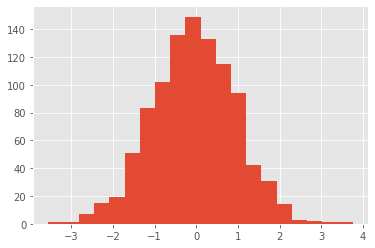

In [22]:
# create a random number generator
rng = np.random.default_rng(seed=seed)
normal = rng.standard_normal(1000)
plt.hist(normal,bins =20);
# ';' means the array isnt dispalyed 

## Measurement

- Categorical: Data with a range of distinct values or categories 
    - Nominal: Categorical Data with NO inherent ordr to it 
    - Ordinal: Ordinal Categorical data does have an order to it 
- Scale: Data measured on an interval or ratio scale, where the data values indicate order of value and distance between values.

Level of Measurement 

What is a Statistical Test
Statistical tests are used in hypothesis testing. In general, they can be used to:
determine whether an input variable has a statistically significant relationship with an output (target) variable.
estimate the difference between two or more groups.
The idea of how a statistical test works is quite simple: they assume that a particular situation occurs, and then they estimate how likely this assumption is to be false.
Statistical tests assume a null hypothesis.The null hypothesis corresponds to the hypothesis that there is no relationship or difference between the groups (sets) considered. Then they determine whether the observed data come outside or inside of the range of values predicted by the null hypothesis.
There are multiple statistical tests, which vary according to the problem to be faced and the characteristics of the data available. Now we’re going to go through them in detail, and then apply some of them in Python.
How a Statistical Test Works
The output value of a statistical test is defined (with enormous imagination 😆) a test statistic — a number that describes how much the relationship between input and output variables in your test differs from the null hypothesis.
But this is not the result that interests us.
What allows us to understand whether the null hypothesis is true or not is the p-value (probability value). The p-value estimates how plausible it is that you would see the difference reported by the test statistic if the null hypothesis were true.
To say whether the p-value is significant or not, we need a significance threshold called the significance level. This threshold is usually set at 0.05, but we won’t get into this boring mathematician discussion. 😉
If the p-value is BELOW the threshold (meaning smaller than), then you can infer a statistically significant relationship between the input and target variables.
Otherwise, then you can infer no statistically significant relationship between the predictor and outcome variables.
Let’s take a quick example. I apply T-test between two groups. If the T-test’s corresponding p-value is .03, then a statistically significant relationship would be implied. There is only a 3% probability the null hypotesis is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c

## ANOVA

ANOVA stands for Analysis of Variance. It’s a statistical test that was developed by Ronald Fisher in 1918 and has been in use ever since. Put simply, ANOVA tells you if there are any statistical differences between the means of three or more independent groups.

One-way ANOVA is the most basic form. There are other variations that can be used in different situations, including:

Two-way ANOVA
Factorial ANOVA
Welch’s F-test ANOVA
Ranked ANOVA
Games-Howell pairwise test

https://www.qualtrics.com/uk/experience-management/research/anova/

How does ANOVA work?
Like the t-test, ANOVA helps you find out whether the differences between groups of data are statistically significant. It works by analysing the levels of variance within the groups through samples taken from each of them.

If there is a lot of variance (spread of data away from the mean) within the data groups, then there is more chance that the mean of a sample selected from the data will be different due to chance.

As well as looking at variance within the data groups, ANOVA takes into account sample size (the larger the sample, the less chance there will be of picking outliers for the sample by chance) and the differences between sample means (if the means of the samples are far apart, it’s more likely that the means of the whole group will be too).

All these elements are combined into a F value, which can then be analysed to give a probability (p-value) of whether or not differences between your groups are statistically significant.

A one-way ANOVA compares the effects of an independent variable (a factor that influences other things) on multiple dependent variables. Two-way ANOVA does the same thing, but with more than one independent variable, while a factorial ANOVA extends the number of independent variables even further.

How can ANOVA help?
The one-way ANOVA can help you know whether or not there are significant differences between the means of your independent variables.

Why is that useful?

Because when you understand how each independent variable’s mean is different from the others, you can begin to understand which of them has a connection to your dependent variable (such as landing page clicks) and begin to learn what is driving that behaviour.

You could also flip things around and see whether or not a single independent variable (such as temperature) affects multiple dependent variables (such as purchase rates of suncream, attendance at outdoor venues, and likelihood to hold a cook-out) and if so, which ones.

When might you use ANOVA?
You might use Analysis of Variance (ANOVA) as a marketer when you want to test a particular hypothesis. You would use ANOVA to help you understand how your different groups respond, with a null hypothesis for the test that the means of the different groups are equal. If there is a statistically significant result, then it means that the two populations are unequal (or different)

## One-way ANOVA

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups). For example, you could use a one-way ANOVA to understand whether exam performance differed based on test anxiety levels amongst students, dividing students into three independent groups (e.g., low, medium and high-stressed students). Also, it is important to realize that the one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other; it only tells you that at least two groups were different. Since you may have three, four, five or more groups in your study design, determining which of these groups differ from each other is important. You can do this using a post hoc test (N.B., we discuss post hoc tests later in this guide).

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php


## Which test to use 

## Assumptions 

When doing statistical test, you must make certain. These assumption serve as the foundation for your test and if you fail do these your test will unreliable. It is only appropriate to use ANOVA if your data meet the following 6 assupmtions 

When you choose to analyse your data using a one-way ANOVA, part of the process involves checking to make sure that the data you want to analyse can actually be analysed using a one-way ANOVA. You need to do this because it is only appropriate to use a one-way ANOVA if your data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. In practice, checking for these six assumptions just adds a little bit more time to your analysis, requiring you to click a few more buttons in SPSS Statistics when performing your analysis, as well as think a little bit more about your data, but it is not a difficult task.

Before we introduce you to these six assumptions, do not be surprised if, when analysing your own data using SPSS Statistics, one or more of these assumptions is violated (i.e., is not met). This is not uncommon when working with real-world data rather than textbook examples, which often only show you how to carry out a one-way ANOVA when everything goes well! However, don’t worry. Even when your data fails certain assumptions, there is often a solution to overcome this. First, let’s take a look at these six assumptions:

- Assumption #1: 
The dependent variable, key variable is a continuous numerical valus; floating point number

Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous). Examples of variables that meet this criterion include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth. You can learn more about interval and ratio variables in our article: https://statistics.laerd.com/statistical-guides/types-of-variable.php.

- Assumption #2: 
The independent varialbe should be a categorical. Instances of the data can be part of multple categorical variable   

Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups, but it can be used for just two groups (but an independent-samples t-test is more commonly used for two groups). Example independent variables that meet this criterion include ethnicity (e.g., 3 groups: Caucasian, African American and Hispanic), physical activity level (e.g., 4 groups: sedentary, low, moderate and high), profession (e.g., 5 groups: surgeon, doctor, nurse, dentist, therapist), and so forth.

- Assumption #3: 
Each observation should be independent. There should. CAnt use ANOVA if this isn ot the case 

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the one-way ANOVA. If your study fails this assumption, you will need to use another statistical test instead of the one-way ANOVA (e.g., a repeated measures design). If you are unsure whether your study meets this assumption, you can use our Statistical Test Selector, which is part of our enhanced guides.

- Assumption #4: 

There should be no significant outliers. 

Outliers are simply single data points within your data that do not follow the usual pattern (e.g., in a study of 100 students' IQ scores, where the mean score was 108 with only a small variation between students, one student had a score of 156, which is very unusual, and may even put her in the top 1% of IQ scores globally). The problem with outliers is that they can have a negative effect on the one-way ANOVA, reducing the validity of your results. Fortunately, when using SPSS Statistics to run a one-way ANOVA on your data, you can easily detect possible outliers. In our enhanced one-way ANOVA guide, we: (a) show you how to detect outliers using SPSS Statistics; and (b) discuss some of the options you have in order to deal with outliers. You can learn more about our enhanced one-way ANOVA guide on our Features: One-way ANOVA page.


- Assumption #5: 
Each category fall into a bell shaped curve, same height of a peak 
Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results. You can test for normality using the Shapiro-Wilk test of normality, which is easily tested for using SPSS Statistics. In addition to showing you how to do this in our enhanced one-way ANOVA guide, we also explain what you can do if your data fails this assumption (i.e., if it fails it more than a little bit). Again, you can learn more on our Features: One-way ANOVA page.


- Assumption #6: 
The bell shaped curve needs to be similar shape 

There needs to be homogeneity of variances. You can test this assumption in SPSS Statistics using Levene's test for homogeneity of variances. If your data fails this assumption, you will need to not only carry out a Welch ANOVA instead of a one-way ANOVA, which you can do using SPSS Statistics, but also use a different post hoc test. In our enhanced one-way ANOVA guide, we (a) show you how to perform Levene’s test for homogeneity of variances in SPSS Statistics, (b) explain some of the things you will need to consider when interpreting your data, and (c) present possible ways to continue with your analysis if your data fails to meet this assumption, including running a Welch ANOVA in SPSS Statistics instead of a one-way ANOVA, and a Games-Howell test instead of a Tukey post hoc test (learn more on our Features: One-way ANOVA page).

You can check assumptions #4, #5 and #6 using SPSS Statistics. Before doing this, you should make sure that your data meets assumptions #1, #2 and #3, although you don't need SPSS Statistics to do this. Remember that if you do not run the statistical tests on these assumptions correctly, the results you get when running a one-way ANOVA might not be valid. This is why we dedicate a number of sections of our enhanced one-way ANOVA guide to help you get this right. You can find out about our enhanced one-way ANOVA guide on our Features: One-way ANOVA page, or more generally, our enhanced content as a whole on our Features: Overview page.

In the section, Test Procedure in SPSS Statistics, we illustrate the SPSS Statistics procedure to perform a one-way ANOVA assuming that no assumptions have been violated. First, we set out the example we use to explain the one-way ANOVA procedure in SPSS Statistics.

ANOVA in python 

https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html

In [2]:
import matplotlib.pyplot as plt
# for dataframes
import pandas as pd  
import seaborn as sns

#set size and style of graph
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

#import our dataset using pandas
df = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv")
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


The data set contains information on 76 people who undertook one of three diets (referred to as diet A, B and C). There is background information such as age, gender, and height. The aim of the study was to see which diet was best for losing weight. 

Lets start by defining a new column weight.loss, corresponding to the difference between the initial and final weights (respectively the corresponding to the columns initial.weight and final.weight of the dataset)

In [9]:
# Declare a list that is to be converted into a column
weightLoss = df['pre.weight'] - df['weight6weeks']
 
# Using 'Address' as the column name
# and equating it to the list
df['weightLoss'] = weightLoss
 
# Observe the result
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightloss,weightLoss
0,25,,41,171,60,2,60.0,0.0,0.0
1,26,,32,174,103,2,103.0,0.0,0.0
2,1,0,22,159,58,1,54.2,3.8,3.8
3,2,0,46,192,60,1,54.0,6.0,6.0
4,3,0,55,170,64,1,63.3,0.7,0.7


In [10]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks,weightloss,weightLoss
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769,3.844872,3.844872
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504,2.551478,2.551478
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000,-2.100000,-2.100000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000,2.000000,2.000000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000,3.600000,3.600000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000,5.550000,5.550000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000,9.200000,9.200000


In [11]:
# The dependent variable
# Meets assumption 1
dependent = df['weightLoss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightLoss, Length: 78, dtype: float64

In [12]:
# The independent variable
# Meets assumptions 2, is categorical 
independent = df['Diet']
independent

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

In [13]:
dependent.describe()

count    78.000000
mean      3.844872
std       2.551478
min      -2.100000
25%       2.000000
50%       3.600000
75%       5.550000
max       9.200000
Name: weightLoss, dtype: float64

### Assumption 4

### Box plot 

A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers
Maximum (Q4 or 100th percentile): the highest data point in the data set excluding any outliers
Median (Q2 or 50th percentile): the middle value in the data set
First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), it is the median of the lower half of the dataset.
Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), it is the median of the upper half of the dataset

https://en.wikipedia.org/wiki/Box_plot

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot()

# Reference 
***

[1] https://scipy.github.io/devdocs/tutorial/general.html

[2] https://docs.scipy.org/doc/scipy/reference/stats.html